<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Assignment 6: Neural Network for Classification and Regression 

<font color="red">Updated April 4, 1:00 PM</font>

By typing my name, I confirm that the code, experiments, results, and discussions are all written by me, except for the code provided by the instructor.  

*type your name here*

Starting with the `NeuralNetwork` class designed for classification from A5, modify the code so that your neural network can be applied to classification and regression problems.

# <font color="red">**100 points**</font>: Code Requirements

Complete the following code by writing python expressions in place of all `...`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class NeuralNetwork:
   
    def __init__(self, n_inputs, n_hidden_units_per_layer,  n_outputs_or_class_names):
       
        self.debug = False

        self.n_inputs = n_inputs
        self.n_hidden_units_per_layer = n_hidden_units_per_layer
        self.n_hidden_layers = len(n_hidden_units_per_layer)

        if isinstance(n_outputs_or_class_names, int):
            self.classifier = False
            self.n_outputs = n_outputs_or_class_names
        else:
            self.classifier = True
            self.classes = np.array(n_outputs_or_class_names)
            self.n_outputs = len(self.classes)
       
        # Make list of weight matrices for each layer
        self.Ws = []
        self.dWs = []
        ni = n_inputs
        for nh in self.n_hidden_units_per_layer:
            W = self._make_W(ni, nh)
            self.Ws.append(W)
            self.dWs.append(np.zeros_like(W))
            ni = nh
        W = self._make_W(ni, self.n_outputs)
        self.Ws.append(W)
        self.dWs.append(np.zeros_like(W))

        if self.debug:
            for layeri, W in enumerate(self.Ws):
                print(f'Layer {layeri + 1}: {W.shape=}')
                
        self.epochs = 0
        self.mse_trace = []
        self.percent_correct_trace = []
       
        self.X_means = None
        self.X_stds = None
        self.T_means = None
        self.T_stds = None
       
        
    def __repr__(self):
        s = f'NeuralNetwork({self.n_inputs}, {self.n_hidden_units_per_layer}, '
        if self.classifier:
            s += f'{self.classes})'
            kind = 'classification'
        else:
            s += f'{self.n_outputs})'
            kind = 'regression'
        if self.epochs == 0:
            s += f'\n Not trained yet on a {kind} problem.'
        else:
            s += f'\n Trained on a {kind} problem for {self.epochs} epochs '
            if self.classifier:
                s += f'with a final training percent correct of {self.percent_correct_trace[-1]:.2f}.'
            else:
                s += f'with a final training MSE of {self.mse_trace[-1]:.4g}.'
        return s

    def __str__(self):
        return self.__repr__()

    def set_debug(self, true_false):
        self.debug = true_false
        
    def _make_W(self, ni, nu):
        ...
    
    def _f(self, S):
        ...

    def _df(self, fS):
        ...
    
    def train(self, X, T, n_epochs, learning_rate, momentum=0, verbose=True):

        if self.debug:
            print('----------Starting train()')

        learning_rate = learning_rate / X.shape[0]  # n_samples
        
        if self.debug:
            print(f'Adjusted {learning_rate=}')
            
        # Standardize X
        X = self._standardizeX(X)
       
        if self.debug:
            print(f'First row in standardized X is\n {X[0, :]}')
            
        ...

        if self.debug:
            print('----------Returning from train()')

        return self
               
    def use(self, X, standardized=False):
        if self.debug:
            print('----------Starting use()')

        ...

    def _standardizeX(self, X):
        # return X
        if self.X_means is None:
            self.X_means = np.mean(X, axis=0)
            self.X_stds = np.std(X, axis=0)
            self.X_stds[self.X_stds == 0] = 1
        return (X - self.X_means) / self.X_stds
   
    def _standardizeT(self, T):
        # return T
        if self.T_means is None:
            self.T_means = np.mean(T, axis=0)
            self.T_stds = np.std(T, axis=0)
            self.T_stds[self.T_stds == 0] = 1
        return (T - self.T_means) / self.T_stds
   
    def _unstandardizeT(self, T):
        # return T
        
        if self.T_means is None:
            raise Exception('T not standardized yet')

        return ...

    def _make_indicator_vars(self, T):
        return (T == np.unique(T)).astype(int)
   
    def _add_ones(self, X):
        return np.insert(X, 0, 1, 1)
    
    def _softmax(self, Y):
        fs = np.exp(Y)  # N x K
        denom = np.sum(fs, axis=1).reshape((-1, 1))
        return fs / denom
   
    def _E(self, X, T_iv_or_T):
        if self.classifier:
            Y_class_names, Y_softmax = self.use(X, standardized=True)
            sq_diffs = (T_iv_or_T - Y_softmax) ** 2
        else:
            Y = self.use(X, standardized=True)
            sq_diffs = (T_iv_or_T - Y) ** 2
        return np.mean(sq_diffs)

    def percent_correct(self, T, Y_classes):
        return 100 * np.mean(T == Y_classes)


#  Test your `NeuralNetwork` Class on a Classification Problem

Test your code using the following data consisting of samples having a single $x$ value and target class values of 0, 1, or 2.

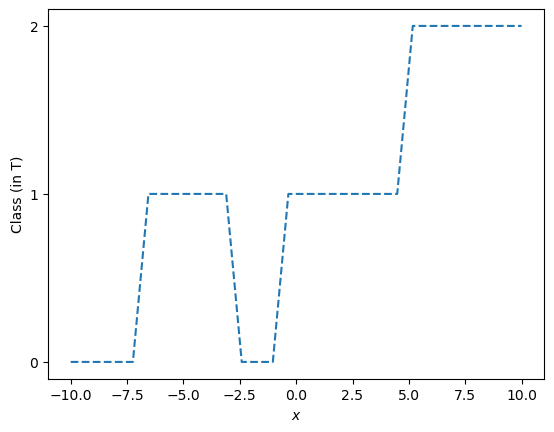

In [3]:
X = np.linspace(-10, 10, 30).reshape(-1, 1)
T = np.array([0] * 5 + 
             [1] * 6 + 
             [0] * 3 + 
             [1] * 8 + 
             [2] * 8).reshape(-1, 1)

plt.plot(X, T, '--')
plt.xlabel('$x$')
plt.ylabel('Class (in T)')
plt.yticks([0, 1, 2]);

Here is a plotting function you can use to show the results of training your network for any number of hidden layers and units per layer.

In [4]:
def plot_hidden_outputs(model, ploti, n_plot_rows):
    for layer_i in reversed(range(model.n_hidden_layers)):
        ploti += 1
        plt.subplot(n_plot_rows, 1, ploti)
        plt.plot(X, model.Hs[layer_i + 1])
        plt.ylabel(f'Hidden Layer {layer_i + 1}')

def plot_classification_model(model, X, T):

    n_plot_rows = 3 + model.n_hidden_layers
    plt.subplot(n_plot_rows, 2, 1)
    plt.plot(model.mse_trace)
    plt.ylabel('MSE')

    plt.subplot(n_plot_rows, 2, 2)
    plt.plot(model.percent_correct_trace)
    plt.ylabel('Percent Correct')

    Y_classes, Y_softmax = model.use(X)

    plt.subplot(n_plot_rows, 1, 2)
    plt.plot(X, T, '--')
    # plt.plot(X, Y_softmax)
    plt.plot(X, Y_classes, 'o')
    plt.legend(('$T$', '$Y_{classes}$'))

    plt.subplot(n_plot_rows, 1, 3)
    plt.plot(X, Y_softmax)
    plt.legend([f'$Ysm_{i}$' for i in range(len(model.classes))])
    plt.ylabel('Softmax Outputs')

    plot_hidden_outputs(model, 3, n_plot_rows)

    plt.tight_layout()

For example, here is what you should see when you try a neural network with two hidden layers of 10 and 5 units, respectively.

Epoch 1000: 83.33% correct
Epoch 2000: 86.67% correct
Epoch 3000: 86.67% correct
Epoch 4000: 90.00% correct
Epoch 5000: 100.00% correct
Epoch 6000: 100.00% correct
Epoch 7000: 100.00% correct
Epoch 8000: 100.00% correct
Epoch 9000: 100.00% correct
Epoch 10000: 100.00% correct
100.0


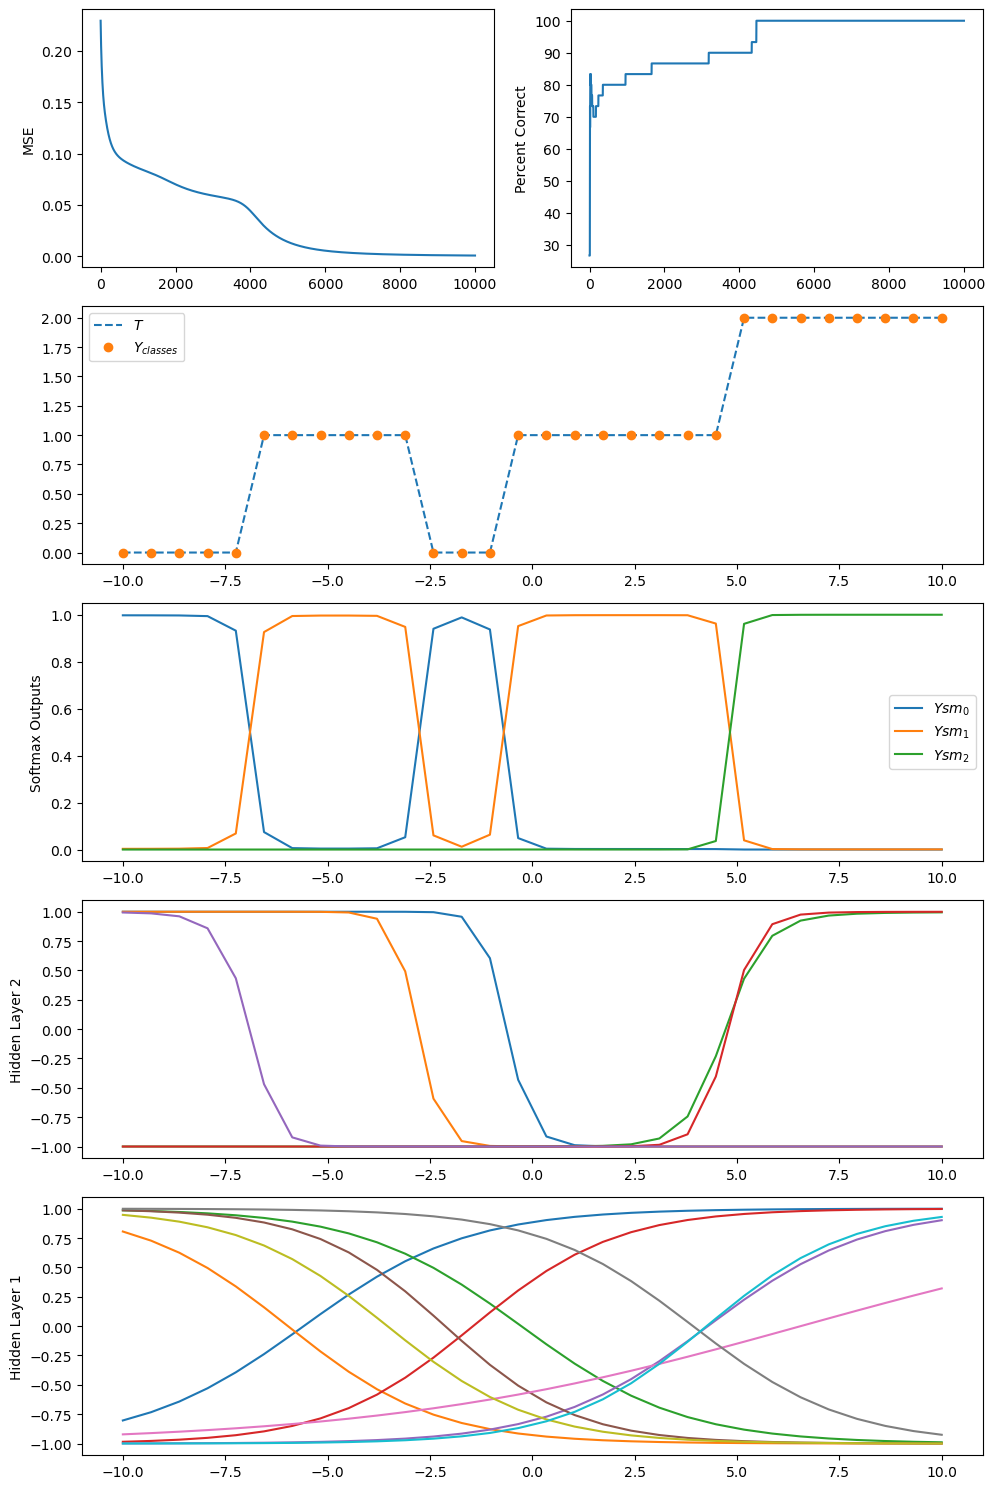

In [5]:
np.random.seed(111)

n_inputs = X.shape[1]
classes = [0, 1, 2]
model = NeuralNetwork(n_inputs, [10, 5], classes)

n_epochs = 10000
learning_rate = 0.02
model.train(X, T, n_epochs, learning_rate)
Y_classes, Y_softmax = model.use(X)

print(model.percent_correct(T, Y_classes))

plt.figure(figsize=(10, 15))
plot_classification_model(model, X, T)

#  Test your `NeuralNetwork` Class on a Regression Problem

Test your code using the following data consisting of samples having a single $x$ value and target values from a sine function.

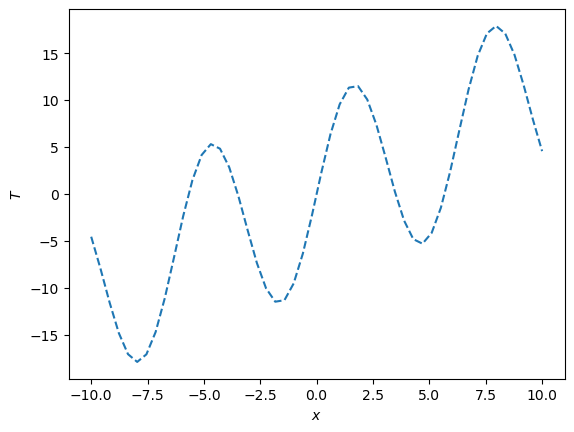

In [6]:
X = np.linspace(-10, 10, 50).reshape(-1, 1)
T = X + 10 * np.sin(X)

plt.plot(X, T, '--')
plt.xlabel('$x$')
plt.ylabel('$T$');

Here is another plotting function for regression network.

In [7]:
def plot_regression_model(model, X, T):

    n_plot_rows = 2 + model.n_hidden_layers
    plt.subplot(n_plot_rows, 1, 1)
    plt.plot(model.mse_trace)
    plt.ylabel('MSE')

    Y = model.use(X)

    plt.subplot(n_plot_rows, 1, 2)
    plt.plot(X, T, '--')
    # plt.plot(X, Y_softmax)
    plt.plot(X, Y, 'o')
    plt.legend(('$T$', '$Y$'))

    plot_hidden_outputs(model, 2, n_plot_rows)

    plt.tight_layout()

Epoch 1000: 0.4851 MSE
Epoch 2000: 0.4544 MSE
Epoch 3000: 0.0706 MSE
Epoch 4000: 0.0265 MSE
Epoch 5000: 0.0066 MSE
Epoch 6000: 0.0041 MSE
Epoch 7000: 0.0023 MSE
Epoch 8000: 0.0014 MSE
Epoch 9000: 0.0010 MSE
Epoch 10000: 0.0007 MSE
RMSE is 0.25515856932408715


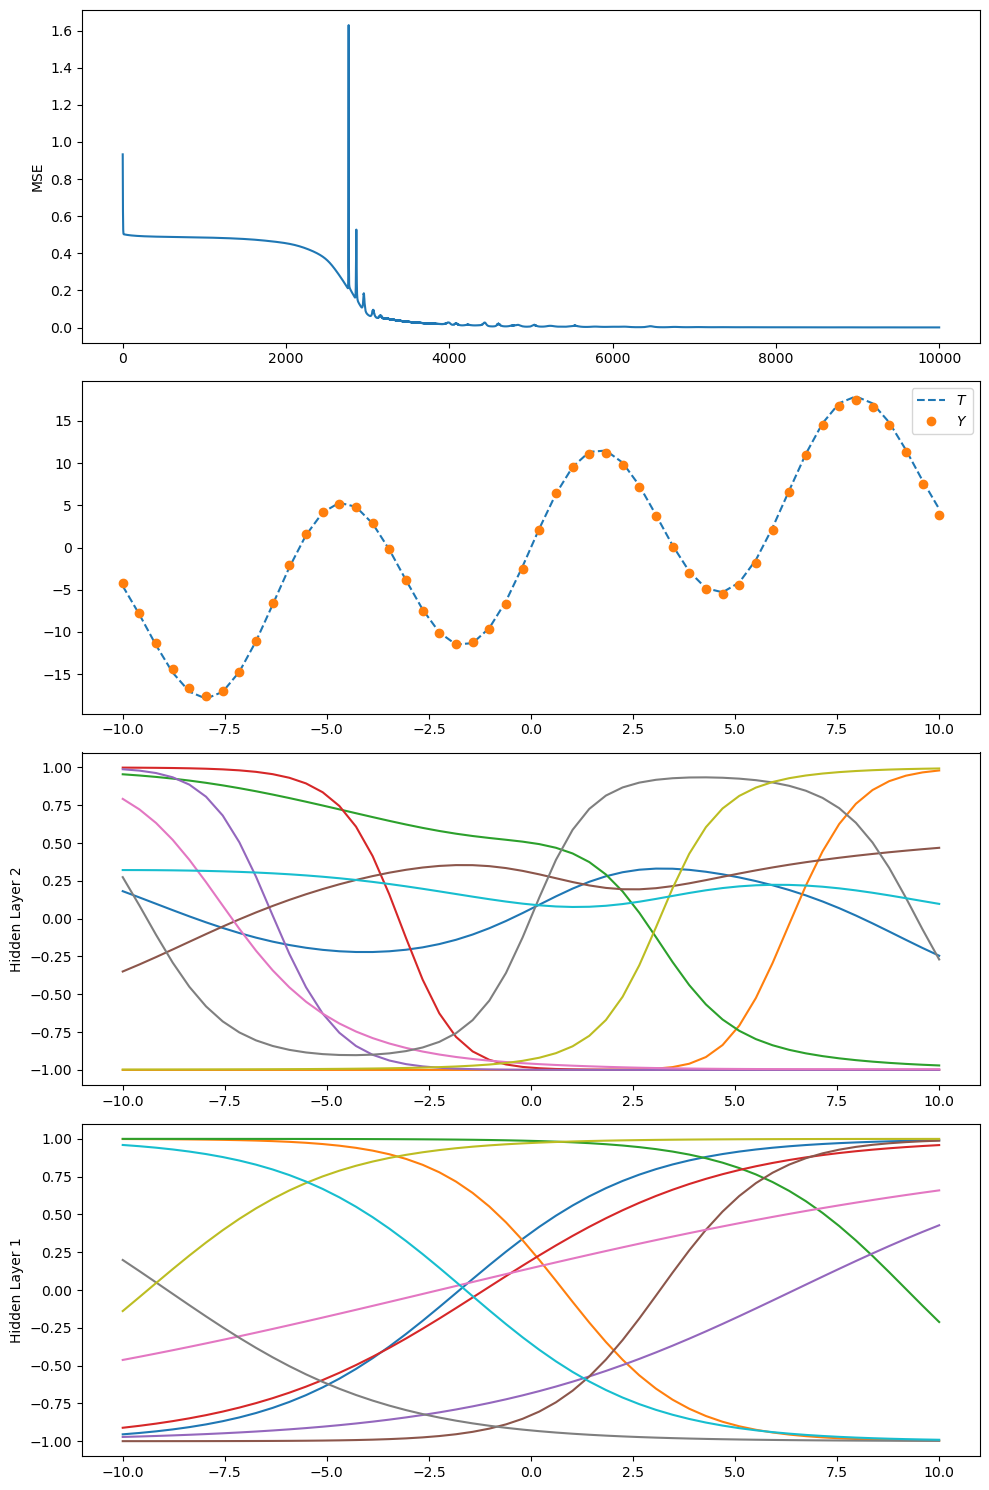

In [10]:
np.random.seed(222)

n_inputs = X.shape[1]
model = NeuralNetwork(n_inputs, [10, 10], 1)
model.train(X, T, 10000, 0.1)
Y = model.use(X)

print('RMSE is', np.sqrt(np.mean((T - model.use(X))**2)))

plt.figure(figsize=(10, 15))
plot_regression_model(model, X, T)

# Debugging Output

If you add statements like
```
    if self.debug:
        print('...helpful values...')
```

you can get things printed out like the following example shows.  Notice the call to 
```
    model.set_debug(True)
```

Each problem is run again, but with just 2 epochs each.

First, a classification problem.

In [2]:
from A6mysolution import NeuralNetwork

In [3]:
np.random.seed(123)

X = np.linspace(-10, 10, 5).reshape(-1, 1)
T = np.array([0] * 2 + 
             [1] * 3).reshape(-1, 1)

classes = [0, 1]
model = NeuralNetwork(X.shape[1], [3], classes)

model.set_debug(True)   # !!!!

n_epochs = 2
learning_rate = 0.02
model.train(X, T, n_epochs, learning_rate, verbose=False)

Y_classes, Y_softmax = model.use(X)

----------Starting train()
Adjusted learning_rate=0.004
First row in standardized X is
 [-1.41421356]
First row of T_iv is
 [1 0]
Starting epoch=0
----------Starting use()
layer_i=0 W.shape=(2, 3) self.Hs[-1].shape=(5, 1)
First two rows of H for this layer are
 [[ 0.1734484  -0.62997976 -0.22840241]
 [ 0.22273745 -0.4791756  -0.29988828]]
For output layer self.Ws[-1].shape=(4, 2) self.Hs[-1].shape=(5, 3)
For output layer output first two rows are
 [[0.59028179 0.12239164]
 [0.57008375 0.18309268]]
First two rows of Y_softmax are
 [[0.61488426 0.38511574]
 [0.59555815 0.40444185]]
First two rows of Y_classes are
 [[0]
 [0]]
----------Returning from use()
First two rows of Y_classes are
 [[0]
 [0]]
First two rows of Y_softmax are
 [[0.61488426 0.38511574]
 [0.59555815 0.40444185]]
First two rows of delta_output are
 [[-0.77023148  0.77023148]
 [-0.8088837   0.8088837 ]]
Starting backward pass
layer_i=1
Using W.shape=(4, 2) and H.shape=(5, 3)
Backproped delta first two rows are
 [[-0.0663

Now for a regression problem.

In [4]:
np.random.seed(321)

X = np.linspace(-10, 10, 5).reshape(-1, 1)
T = X + 10 * np.sin(X)

model = NeuralNetwork(X.shape[1], [5, 2], 1)

model.set_debug(True)

model.train(X, T, 2, 0.1, verbose=False)

Y = model.use(X)

----------Starting train()
Adjusted learning_rate=0.02
First row in standardized X is
 [-1.41421356]
First row of T is
 [-1.11442888]
Starting epoch=0
----------Starting use()
layer_i=0 W.shape=(2, 5) self.Hs[-1].shape=(5, 1)
First two rows of H for this layer are
 [[ 0.45616794 -0.88792435 -0.08957774  0.4338386   0.31216629]
 [ 0.47703381 -0.76346749  0.28604346  0.0538325   0.32773484]]
layer_i=1 W.shape=(6, 2) self.Hs[-1].shape=(5, 5)
First two rows of H for this layer are
 [[-0.24259684 -0.33228999]
 [-0.41219421 -0.4035388 ]]
For output layer self.Ws[-1].shape=(3, 1) self.Hs[-1].shape=(5, 2)
For output layer output first two rows are
 [[-0.46666302]
 [-0.51518099]]
----------Returning from use()
First two rows of Y are
 [[-0.46666302]
 [-0.51518099]]
First two rows of delta_output are
 [[ 1.29553172]
 [-3.273617  ]]
Starting backward pass
layer_i=2
Using W.shape=(3, 1) and H.shape=(5, 2)
Backproped delta first two rows are
 [[ 0.45660346 -0.24252877]
 [-1.01763011  0.5767174 ]]
l

# Extra Credit

To earn up to two points of extra credit, complete the following exercise.

Extra credit points will be added to your final semester average grade.  If this bumps you up to the next higher grade, your grade will be increases.  For example, if your semester average is 89.5 and you have one point of extra credit, your letter grade will be increased to A-.

Find a classification and/or a regression problem that we haven't used in class by searching at Google's [Dataset Search](https://datasetsearch.research.google.com/) page.  In the search box you can try 

    classification
    
or

    regression
    
Build your `Xtrain`, `Ttrain`, `Xtest` and `Ttest` arrays from the data you download.  Most of the work will be in understanding the format of the data and removing rows with missing values. Randomly divide the data into train and test sets, putting about 80% of the data into the train set.

Apply your `NeuralNetwork` class to the train data.  Plot the learning curves (percent correct for classification and MSE for regression).  Report the performance of your resulting neural networks on train data and test data.

If your are successful, you will earn one extra credit point for a classification problem, and one extra credit point for a regression problem.  You may do one or both.